In [878]:
import pandas as pd 
import numpy as np 
import sys 
# Load libraries
import sys
from pathlib import Path
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
sustain_path = '/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/pySuStaIn'
parent_path = str(Path(sustain_path).parent)
if parent_path not in sys.path:
        sys.path.insert(0, parent_path)
import pySuStaIn
import os  

# data readin

In [879]:
ftp = pd.read_csv("ucsf_asymmetry_petcognition_formarlene.csv")
print(ftp.shape)
ftp.head(2)

(123, 446)


,BID,UCSFID,sex,age,dx,amyloid_path,amyloid_date,Left_Cerebral_White_Matter_PIB_SUVR,Left_Lateral_Ventricle_PIB_SUVR,Left_Inf_Lat_Vent_PIB_SUVR,...,CDRSUM,DigitFW,DigitBW,ANCorr,VegCorr,BensonCopy,BensonDelay,CVLT,Trails,cogpet_datediff
0,B19-266,UCSF6819,Male,NaN,ALZHEIMER'S DISEASE + VASCULAR DISEASE,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2019-08-08,2.3937,0.90185,1.6030,...,4.5,5.0,4.0,6.0,-8.0,15.0,4.0,3.0,64.0,1 days
1,B15-271,UCSF9748,Male,77.0,ALZHEIMER'S DISEASE,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2015-08-26,1.8728,0.82788,1.2846,...,6.0,6.0,4.0,15.0,NaN,16.0,3.0,0.0,70.0,40 days


# filtering


In [880]:
# datetime
ftp['taudate'] = pd.to_datetime(ftp['taudate'], errors='coerce')
id_col = 'UCSFID' 
# Filter by age <= 65
ftp = ftp[ftp['age'] <= 65] 
# earliest entry
idx = ftp.groupby(id_col)['taudate'].idxmin()
ftp = ftp.loc[idx].copy()
print(ftp.shape)
ftp.head() 


(70, 446)


,BID,UCSFID,sex,age,dx,amyloid_path,amyloid_date,Left_Cerebral_White_Matter_PIB_SUVR,Left_Lateral_Ventricle_PIB_SUVR,Left_Inf_Lat_Vent_PIB_SUVR,...,CDRSUM,DigitFW,DigitBW,ANCorr,VegCorr,BensonCopy,BensonDelay,CVLT,Trails,cogpet_datediff
7,B14-304,UCSF16304,Female,60.0,ALZHEIMER'S DISEASE + DLB,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2015-01-27,2.3170,0.82206,1.4431,...,7.5,NaN,NaN,2.0,NaN,2.0,2.0,0.0,NaN,14 days
9,B14-237,UCSF16407,Female,62.0,POSTERIOR CORTICAL ATROPHY SYNDROME,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2016-12-02,2.1359,0.62251,1.3144,...,4.5,4.0,3.0,9.0,NaN,5.0,2.0,2.0,120.0,571 days
10,B14-243,UCSF16417,Male,57.0,POSTERIOR CORTICAL ATROPHY SYNDROME,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2014-05-08,1.9724,0.59977,1.1352,...,5.0,7.0,3.0,8.0,NaN,3.0,0.0,1.0,NaN,196 days
11,B14-296,UCSF16476,Female,49.0,ALZHEIMER'S DISEASE,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2018-07-11,2.1179,0.75529,1.6145,...,4.0,-1.0,-1.0,-1.0,-8.0,NaN,NaN,NaN,NaN,1 days
12,B15-281,UCSF17159,Male,62.0,PROGRESSIVE APHASIA - UNSPECIFIED,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2015-08-24,2.0579,0.65833,1.4007,...,NaN,4.0,2.0,10.0,NaN,11.0,6.0,1.0,NaN,619 days


In [881]:
for i in ftp.columns:
    print(i)

col_retain = {
    "UCSFID","BID","PDIN","tau_path","taudate","tiv_ftp","tiv_pib","amyloid_path","amyloid_date",
    "sex","age","Educ","apoe4",
    "dx","ucsf_dx","clin_severity",
    "ftp_cortex","pib_cortex","mri_cortex",
    "MMSETot","CDRSUM","DCDate","DigitFW","DigitBW","ANCorr","VegCorr","BensonCopy","BensonDelay","CVLT","Trails","cogpet_datediff",
    "cortical_ftp_suvr","Centiloid","metaROI_FTP_SUVR","cortical_summary_PiB_SUVR"

}

BID
UCSFID
sex
age
dx
amyloid_path
amyloid_date
Left_Cerebral_White_Matter_PIB_SUVR
Left_Lateral_Ventricle_PIB_SUVR
Left_Inf_Lat_Vent_PIB_SUVR
Left_Cerebellum_White_Matter_PIB_SUVR
Left_Cerebellum_Cortex_PIB_SUVR
Left_Thalamus_Proper_PIB_SUVR
Left_Caudate_PIB_SUVR
Left_Putamen_PIB_SUVR
Left_Pallidum_PIB_SUVR
Left_Hippocampus_PIB_SUVR
Left_Amygdala_PIB_SUVR
Left_Accumbens_area_PIB_SUVR
Left_VentralDC_PIB_SUVR
Left_choroid_plexus_PIB_SUVR
Right_Inf_Lat_Vent_PIB_SUVR
Right_Cerebellum_White_Matter_PIB_SUVR
Right_Cerebellum_Cortex_PIB_SUVR
Right_Thalamus_Proper_PIB_SUVR
Right_Caudate_PIB_SUVR
Right_Putamen_PIB_SUVR
Right_Pallidum_PIB_SUVR
Right_Hippocampus_PIB_SUVR
Right_Amygdala_PIB_SUVR
Right_Accumbens_area_PIB_SUVR
Right_VentralDC_PIB_SUVR
Left_choroid_plexus_SUVR.1_ftp
ctx_lh_bankssts_PIB_SUVR
ctx_lh_caudalanteriorcingulate_PIB_SUVR
ctx_lh_caudalmiddlefrontal_PIB_SUVR
ctx_lh_cuneus_PIB_SUVR
ctx_lh_entorhinal_PIB_SUVR
ctx_lh_fusiform_PIB_SUVR
ctx_lh_inferiorparietal_PIB_SUVR
ctx_lh_infer

# metrics


## cortical suvr

In [882]:
 
# List of Desikan-Killiany ROIs (without hemisphere prefix)
dk_rois = [
  'bankssts', 'caudalanteriorcingulate', 'caudalmiddlefrontal', 'cuneus', 'entorhinal', 'frontalpole',
  'fusiform',  'inferiorparietal', 'inferiortemporal', 'insula', 'isthmuscingulate', 'lateraloccipital',
  'lateralorbitofrontal', 'lingual', 'medialorbitofrontal', 'middletemporal', 'paracentral', 'parahippocampal',
  'parsopercularis', 'parsorbitalis', 'parstriangularis', 'pericalcarine', 'postcentral', 'posteriorcingulate',
  'precentral', 'precuneus', 'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal', 'superiorparietal',
  'superiortemporal', 'supramarginal', 'temporalpole', 'transversetemporal'
] #hippocmapus amygdala 
# Build lists of SUVR and volume columns for both hemispheres, including hippocampus and amygdala
suvr_cols = []
vol_cols = []
included_rois = []

for hemi in ['L', 'R']:
  for roi in dk_rois:
    suvr_col = f'ctx_{hemi.lower()}h_{roi}_FTP_SUVR'
    vol_col = f'vol:ctx_{hemi.lower()}h_{roi}_ftp'
    if suvr_col in ftp.columns and vol_col in ftp.columns:
      suvr_cols.append(suvr_col)
      vol_cols.append(vol_col)
      included_rois.append(f'{hemi}_{roi}')
  # Explicitly add hippocampus and amygdala if not already included
  for subcort in ['Hippocampus', 'Amygdala']:
    suvr_col = f'{hemi}ight_{subcort}_FTP_SUVR' if hemi == 'R' else f'Left_{subcort}_FTP_SUVR'
    vol_col = f'vol:{hemi}ight_{subcort}_ftp' if hemi == 'R' else f'vol:Left_{subcort}_ftp'
    if suvr_col in ftp.columns and vol_col in ftp.columns and suvr_col not in suvr_cols:
      suvr_cols.append(suvr_col)
      vol_cols.append(vol_col)
      included_rois.append(f'{hemi}_{subcort.lower()}')

print(f"Number of DK ROIs (including hippocampus and amygdala) in cortical FTP SUVR calculation: {len(included_rois)}")

# Calculate cortical FTP SUVR (volume-weighted average)
if suvr_cols and vol_cols:
  suvr_vals = ftp[suvr_cols].values
  vol_vals = ftp[vol_cols].values
  cortical_ftp_suvr = (suvr_vals * vol_vals).sum(axis=1) / vol_vals.sum(axis=1)
  ftp['cortical_ftp_suvr'] = cortical_ftp_suvr
   


Number of DK ROIs (including hippocampus and amygdala) in cortical FTP SUVR calculation: 72


## meta roi 

In [883]:
# Define the regions for the metaROI #amygdala, entorhinal, parahippocampal, fusiform, inferior and middle temporal

meta_rois = [
    'amygdala', 'entorhinal', 'parahippocampal', 'fusiform', 'inferiortemporal', 'middletemporal'
]

# Build lists of SUVR and volume columns for both hemispheres for metaROI
meta_suvr_cols = []
meta_vol_cols = []

for hemi in ['L', 'R']:
    for roi in meta_rois:
        suvr_col = f'ctx_{hemi.lower()}h_{roi}_FTP_SUVR'
        vol_col = f'vol:ctx_{hemi.lower()}h_{roi}_ftp'
        if suvr_col in ftp.columns and vol_col in ftp.columns:
            meta_suvr_cols.append(suvr_col)
            meta_vol_cols.append(vol_col)
    suvr_col = f'{hemi}ight_Amygdala_FTP_SUVR' if hemi == 'R' else f'Left_Amygdala_FTP_SUVR'
    vol_col = f'vol:{hemi}ight_Amygdala_ftp' if hemi == 'R' else f'vol:Left_Amygdala_ftp'
    if suvr_col in ftp.columns and vol_col in ftp.columns and suvr_col not in meta_suvr_cols:
        meta_suvr_cols.append(suvr_col)
        meta_vol_cols.append(vol_col)

print(f"metaROI SUVR columns: {len(meta_suvr_cols)}")
print(f"metaROI volume columns: {len(meta_vol_cols)}")

# Calculate metaROI FTP SUVR (volume-weighted average)
if meta_suvr_cols and meta_vol_cols:
    suvr_vals = ftp[meta_suvr_cols].values
    vol_vals = ftp[meta_vol_cols].values
    metaROI_FTP_SUVR = (suvr_vals * vol_vals).sum(axis=1) / vol_vals.sum(axis=1)
    ftp['metaROI_FTP_SUVR'] = metaROI_FTP_SUVR
ftp['metaROI_FTP_SUVR'].describe()

metaROI SUVR columns: 12
metaROI volume columns: 12


count    70.000000
mean      2.175994
std       0.492061
min       1.067469
25%       1.856892
50%       2.124289
75%       2.508303
max       3.273696
Name: metaROI_FTP_SUVR, dtype: float64

## spot check

In [884]:
#spot check 
leads = pd.read_csv('/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/data/baseline_FTP_6mm.csv')
leads
dk_rois = [
    'bankssts', 'caudalanteriorcingulate', 'caudalmiddlefrontal', 'cuneus', 'entorhinal', 'frontalpole',
    'fusiform',  'inferiorparietal', 'inferiortemporal', 'insula', 'isthmuscingulate', 'lateraloccipital',
    'lateralorbitofrontal', 'lingual', 'medialorbitofrontal', 'middletemporal', 'paracentral', 'parahippocampal',
    'parsopercularis', 'parsorbitalis', 'parstriangularis', 'pericalcarine', 'postcentral', 'posteriorcingulate',
    'precentral', 'precuneus', 'rostralanteriorcingulate', 'rostralmiddlefrontal', 'superiorfrontal', 'superiorparietal',
    'superiortemporal', 'supramarginal', 'temporalpole', 'transversetemporal'
]#'hippocampus', 'amygdala',
meta_rois = [
    'amygdala', 'entorhinal', 'parahippocampal', 'fusiform', 'inferiortemporal', 'middletemporal'
]

# Helper to get hemisphere prefix
def roi_colnames(roi_list):
    cols = []
    for hemi in ['L', 'R']:
        for roi in roi_list:
            cols.append(f"{hemi}_{roi}")
    return cols

# Add a 'hemi_roi' column for easier matching
leads['hemi_roi'] = leads['roi'].str.replace('^L_', 'L_', regex=True).str.replace('^R_', 'R_', regex=True)

# --- Cortical FTP calculation ---
cortical_cols = roi_colnames(dk_rois)
leads_cortical = leads[leads['roi'].isin(cortical_cols)].copy()
n_cortical_rois = leads_cortical.groupby(['subj', 'ftp_date']).size()

# Calculate volume-weighted mean for cortical FTP
cortical_ftp = leads_cortical.groupby(['subj', 'ftp_date']).apply(
    lambda x: (x['ftp_suvr'] * x['ftp_vol']).sum() / x['ftp_vol'].sum()
)
cortical_ftp = cortical_ftp.rename('cortical_ftp_suvr').reset_index()

# --- MetaROI FTP calculation ---
meta_cols = roi_colnames(meta_rois)
leads_meta = leads[leads['roi'].isin(meta_cols)].copy()
n_meta_rois = leads_meta.groupby(['subj', 'ftp_date']).size()

meta_ftp = leads_meta.groupby(['subj', 'ftp_date']).apply(
    lambda x: (x['ftp_suvr'] * x['ftp_vol']).sum() / x['ftp_vol'].sum()
)
meta_ftp = meta_ftp.rename('metaROI_FTP_SUVR').reset_index()

# Print number of ROIs used for each subject-date for both calculations
print("Number of ROIs per subject-date for cortical FTP (should be up to", len(cortical_cols), "):")
print(n_cortical_rois.value_counts().sort_index())
print("\nNumber of ROIs per subject-date for metaROI FTP (should be up to", len(meta_cols), "):")
print(n_meta_rois.value_counts().sort_index())

# Show a few results
print("\nSample cortical FTP SUVRs:")
print(cortical_ftp.head())
print("\nSample metaROI FTP SUVRs:")
print(meta_ftp.head())

Number of ROIs per subject-date for cortical FTP (should be up to 68 ):
68    581
Name: count, dtype: int64

Number of ROIs per subject-date for metaROI FTP (should be up to 12 ):
12    581
Name: count, dtype: int64

Sample cortical FTP SUVRs:
         subj    ftp_date  cortical_ftp_suvr
0  LDS0070120  2019-06-20           1.084119
1  LDS0070166  2019-08-21           2.675168
2  LDS0070174  2019-09-11           2.065931
3  LDS0070176  2019-09-13           1.074069
4  LDS0070199  2019-10-15           1.754694

Sample metaROI FTP SUVRs:
         subj    ftp_date  metaROI_FTP_SUVR
0  LDS0070120  2019-06-20          1.167136
1  LDS0070166  2019-08-21          3.019595
2  LDS0070174  2019-09-11          2.351983
3  LDS0070176  2019-09-13          1.103684
4  LDS0070199  2019-10-15          1.987858


## centiloid

In [885]:
# o, Amyloid cortical summary is a mask including 40 different masks. the mask index for freesurfer is:
   #% Define aparc indices for the cortical summary ROI
    #mask_idx = [ ...
    #    1002; 1003; 1008; 1009; 1010; 1012; 1014; 1015; 1018; 1019; 1020; 1023; ...
     #   1025; 1026; 1027; 1028; 1029; 1030; 1031; 1032; 2002; 2003; 2008; 2009; ...
      #  2010; 2012; 2014; 2015; 2018; 2019; 2020; 2023; 2025; 2026; 2027; 2028; ...
       # 2029; 2030; 2031; 2032 ...
    #];
lh = ["ctx-lh-caudalanteriorcingulate","ctx-lh-caudalmiddlefrontal","ctx-lh-inferiorparietal","ctx-lh-inferiortemporal","ctx-lh-isthmuscingulate","ctx-lh-lateralorbitofrontal",
      "ctx-lh-medialorbitofrontal","ctx-lh-middletemporal","ctx-lh-parsopercularis","ctx-lh-parsorbitalis","ctx-lh-parstriangularis","ctx-lh-posteriorcingulate",
      "ctx-lh-precuneus","ctx-lh-rostralanteriorcingulate","ctx-lh-rostralmiddlefrontal","ctx-lh-superiorfrontal","ctx-lh-superiorparietal","ctx-lh-superiortemporal",
      "ctx-lh-supramarginal","ctx-lh-frontalpole"]
rh = ["ctx-rh-caudalanteriorcingulate","ctx-rh-caudalmiddlefrontal","ctx-rh-inferiorparietal","ctx-rh-inferiortemporal","ctx-rh-isthmuscingulate","ctx-rh-lateralorbitofrontal","ctx-rh-medialorbitofrontal","ctx-rh-middletemporal","ctx-rh-parsopercularis","ctx-rh-parsorbitalis","ctx-rh-parstriangularis","ctx-rh-posteriorcingulate","ctx-rh-precuneus","ctx-rh-rostralanteriorcingulate","ctx-rh-rostralmiddlefrontal","ctx-rh-superiorfrontal","ctx-rh-superiorparietal","ctx-rh-superiortemporal","ctx-rh-supramarginal","ctx-rh-frontalpole"]
len(lh) == len(rh)


True

In [886]:
# Combine lh and rh lists for cortical summary
cortical_summary_rois = lh + rh

# Build lists of PiB SUVR and volume columns for these regions
pib_suvr_cols = []
pib_vol_cols = []
for roi in cortical_summary_rois:
    # Convert to PiB SUVR and volume column names
    suvr_col = roi.replace('ctx-', 'ctx_').replace('-','_') + '_PIB_SUVR'
    vol_col = 'vol:' + roi.replace('ctx-', 'ctx_').replace('-','_') + '_pib'
    if suvr_col in ftp.columns and vol_col in ftp.columns:
        pib_suvr_cols.append(suvr_col)
        pib_vol_cols.append(vol_col)

print(f"Number of PiB SUVR columns: {len(pib_suvr_cols)}")
print(f"Number of PiB volume columns: {len(pib_vol_cols)}")
# Calculate cortical summary PiB SUVR (volume-weighted average) using groupby and lambda
if pib_suvr_cols and pib_vol_cols:
    # Prepare a DataFrame in long format for SUVR and volume
    suvr_long = ftp[pib_suvr_cols]
    vol_long = ftp[pib_vol_cols]
    # Stack to long format
    suvr_long = suvr_long.stack().reset_index(level=1, drop=True).rename('suvr')
    vol_long = vol_long.stack().reset_index(level=1, drop=True).rename('vol')
    # Combine into a single DataFrame
    suvr_vol_long = pd.concat([suvr_long, vol_long], axis=1)
    suvr_vol_long['index'] = suvr_vol_long.index
    # Group by subject (row index) and calculate weighted average
    weighted_suvr = suvr_vol_long.groupby('index').apply(lambda x: np.average(x['suvr'], weights=x['vol']))
    ftp['cortical_summary_PiB_SUVR'] = weighted_suvr.values

Number of PiB SUVR columns: 40
Number of PiB volume columns: 40


In [887]:
# Calculate Centiloid (CL) from cortical_summary_PiB_SUVR using the given equation
ftp['Centiloid'] = 99.54 * ftp['cortical_summary_PiB_SUVR'] - 111.00

# Print out statistics for the new Centiloid column
print(ftp['Centiloid'].describe())

count     70.000000
mean      98.033191
std       31.413016
min       13.907892
25%       81.241449
50%      100.951283
75%      115.825601
max      175.204659
Name: Centiloid, dtype: float64


## sustain roi 

In [888]:
# create dict to map parcellations to lobar ROI
lobe_dict = {
'L_MTL': ['L_entorhinal','L_amygdala' ],#'L_hippocampus'
'R_MTL': ['R_entorhinal','R_amygdala'],#,'R_hippocampus'

'L_temporal': ['L_superiortemporal', 'L_middletemporal', 'L_inferiortemporal','L_transversetemporal',
               'L_parahippocampal','L_fusiform'],
'R_temporal': ['R_superiortemporal', 'R_middletemporal','R_inferiortemporal','R_transversetemporal',
               'R_parahippocampal','R_fusiform'],

'L_frontal':['L_superiorfrontal','L_rostralmiddlefrontal','L_caudalmiddlefrontal', #middle frontal gyrus
             'L_parsopercularis', 'L_parsorbitalis', 'L_parstriangularis', #inferior frontal gyrus 
            'L_lateralorbitofrontal','L_medialorbitofrontal', #occipitalfrontal cortex
            'L_rostralanteriorcingulate', 'L_caudalanteriorcingulate',#cingulate
            'L_precentral','L_insula'],
            
'R_frontal':['R_superiorfrontal', 'R_rostralmiddlefrontal', 'R_caudalmiddlefrontal',
             'R_parsopercularis', 'R_parsorbitalis', 'R_parstriangularis',  
             'R_lateralorbitofrontal','R_medialorbitofrontal',
             'R_rostralanteriorcingulate','R_caudalanteriorcingulate', 
              'R_precentral', 'R_insula'], #paracentral
 
'L_occipital':['L_lateraloccipital','L_lingual','L_cuneus','L_pericalcarine'],
'R_occipital':['R_lateraloccipital','R_lingual','R_cuneus','R_pericalcarine'],

'L_parietal':['L_superiorparietal','L_inferiorparietal','L_supramarginal',
             'L_postcentral','L_precuneus',
             'L_posteriorcingulate','L_isthmuscingulate'],#cingulate
'R_parietal':['R_superiorparietal','R_inferiorparietal','R_supramarginal',
              'R_postcentral','R_precuneus', 
             'R_posteriorcingulate', 'R_isthmuscingulate']
}
# use this to subset data for correct ordering!
lobes = ['L_MTL', 'R_MTL', 'L_temporal', 'R_temporal', 'L_frontal', 'R_frontal', 
         'L_occipital', 'R_occipital','L_parietal', 'R_parietal' ]


In [889]:
# Get the set of all unique ROIs used in lobe_dict
all_lobar_rois = set(sum(lobe_dict.values(), []))
print(f"Total number of unique ROIs used in lobar SUVR calculation: {len(all_lobar_rois)}")
print(sorted(all_lobar_rois))
# Calculate volume-weighted mean SUVR for each lobar ROI defined in lobe_dict
lobar_suvr = {}
for lobe, rois in lobe_dict.items():
    suvr_cols = []
    vol_cols = []
    for roi in rois:
        # Try both left/right and ctx naming conventions
        if roi.startswith('L_'):
            suvr_col = f'ctx_lh_{roi[2:]}_FTP_SUVR'
            vol_col = f'vol:ctx_lh_{roi[2:]}_ftp'
        elif roi.startswith('R_'):
            suvr_col = f'ctx_rh_{roi[2:]}_FTP_SUVR'
            vol_col = f'vol:ctx_rh_{roi[2:]}_ftp'
        else:
            continue
        if suvr_col in ftp.columns and vol_col in ftp.columns:
            suvr_cols.append(suvr_col)
            vol_cols.append(vol_col)
        # For hippocampus and amygdala, also check subcortical naming
        if roi.endswith('hippocampus') or roi.endswith('amygdala'):
            hemi = 'Left' if roi.startswith('L_') else 'Right'
            subcort = roi.split('_')[1].capitalize()
            suvr_col2 = f'{hemi}_{subcort}_FTP_SUVR'
            vol_col2 = f'vol:{hemi}_{subcort}_ftp'
            if suvr_col2 in ftp.columns and vol_col2 in ftp.columns:
                suvr_cols.append(suvr_col2)
                vol_cols.append(vol_col2)
    if suvr_cols and vol_cols:
        suvr_vals = ftp[suvr_cols].values
        vol_vals = ftp[vol_cols].values
        lobar_suvr[lobe] = (suvr_vals * vol_vals).sum(axis=1) / vol_vals.sum(axis=1)
        ftp[lobe + '_lobar_suvr'] = lobar_suvr[lobe]
        print(f"{lobe}: {len(suvr_cols)} ROIs used for volume-weighted mean SUVR")
    else:
        print(f"{lobe}: No matching ROIs found in ftp columns.")

print(f"\nTotal lobar ROIs calculated: {len(lobar_suvr)}")


Total number of unique ROIs used in lobar SUVR calculation: 62
['L_amygdala', 'L_caudalanteriorcingulate', 'L_caudalmiddlefrontal', 'L_cuneus', 'L_entorhinal', 'L_fusiform', 'L_inferiorparietal', 'L_inferiortemporal', 'L_insula', 'L_isthmuscingulate', 'L_lateraloccipital', 'L_lateralorbitofrontal', 'L_lingual', 'L_medialorbitofrontal', 'L_middletemporal', 'L_parahippocampal', 'L_parsopercularis', 'L_parsorbitalis', 'L_parstriangularis', 'L_pericalcarine', 'L_postcentral', 'L_posteriorcingulate', 'L_precentral', 'L_precuneus', 'L_rostralanteriorcingulate', 'L_rostralmiddlefrontal', 'L_superiorfrontal', 'L_superiorparietal', 'L_superiortemporal', 'L_supramarginal', 'L_transversetemporal', 'R_amygdala', 'R_caudalanteriorcingulate', 'R_caudalmiddlefrontal', 'R_cuneus', 'R_entorhinal', 'R_fusiform', 'R_inferiorparietal', 'R_inferiortemporal', 'R_insula', 'R_isthmuscingulate', 'R_lateraloccipital', 'R_lateralorbitofrontal', 'R_lingual', 'R_medialorbitofrontal', 'R_middletemporal', 'R_parahip

In [890]:
# Create roi_long DataFrame: id, lobe, suvr (long format for all lobes)
roi_long = pd.DataFrame({
    'id': np.repeat(ftp[id_col].values, len(lobes)),
    'lobe': np.tile(lobes, len(ftp)),
    'suvr': np.concatenate([lobar_suvr[lobe] for lobe in lobes])
})
roi_long.head()

,id,lobe,suvr
0,UCSF16304,L_MTL,1.806942
1,UCSF16304,R_MTL,1.699387
2,UCSF16304,L_temporal,2.354814
3,UCSF16304,R_temporal,2.296502
4,UCSF16304,L_frontal,1.980546


In [891]:
# Pivot roi_long to wide format
roi_wide = roi_long.pivot_table(
    index='id',
    columns='lobe',
    values='suvr'
).reset_index()
roi_wide.columns.name = None
# Merge with original ftp to get columns in col_retain 
id_col = 'UCSFID'
ftp_subset = ftp[[col for col in col_retain if col in ftp.columns]].drop_duplicates(subset=[id_col])
# Merge on id
roi_wide_merged = roi_wide.merge(ftp_subset, left_on='id', right_on=id_col, how='left')
print(roi_wide_merged.shape)
roi_wide_merged.head()


(70, 44)


,id,L_MTL,L_frontal,L_occipital,L_parietal,L_temporal,R_MTL,R_frontal,R_occipital,R_parietal,...,metaROI_FTP_SUVR,amyloid_path,VegCorr,tau_path,BensonCopy,amyloid_date,ftp_cortex,Trails,BensonDelay,mri_cortex
0,UCSF16304,1.806942,1.980546,1.706377,1.886689,2.354814,1.699387,1.403835,1.651749,1.603003,...,2.385382,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,NaN,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,2.0,2015-01-27,1.909462,NaN,2.0,314293.0
1,UCSF16407,1.920555,2.005679,1.545732,1.679501,1.701451,1.612540,2.132331,2.163125,1.445164,...,2.096623,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,NaN,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,5.0,2016-12-02,1.936552,120.0,2.0,359534.0
2,UCSF16417,1.621775,1.039046,2.233562,1.164907,2.121007,1.917448,1.781341,1.969628,1.311392,...,3.273696,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,NaN,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,3.0,2014-05-08,2.578861,NaN,0.0,403958.0
3,UCSF16476,1.885714,1.315862,2.454133,2.613682,2.474658,1.841662,1.588697,1.808285,2.042278,...,3.009549,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,-8.0,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,NaN,2018-07-11,2.995226,NaN,NaN,332148.0
4,UCSF17159,2.052508,2.062763,1.517771,2.148960,1.724566,1.669495,1.437561,1.286702,1.414046,...,3.019830,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,NaN,/Users/jziontz/NeuroCluster/xnat/squid/ucsf/B1...,11.0,2015-08-24,2.524025,NaN,6.0,344063.0


## cognitive 

In [892]:
# Set negative values in DigitFW, DigitBW, and ANCorr to NaN in tdata
for col in ['DigitFW', 'DigitBW', 'ANCorr']:
    if col in roi_wide_merged.columns:
        roi_wide_merged.loc[roi_wide_merged[col] < 0, col] = np.nan

# Rename ANCorr to SemanticFluency for tdata
if 'ANCorr' in roi_wide_merged.columns:
    roi_wide_merged = roi_wide_merged.rename(columns={'ANCorr': 'SemanticFluency'})
roi_wide_merged.shape

(70, 44)

In [893]:
roi_wide_merged.drop(columns=['id'],inplace=True)

In [894]:
#roi_wide_merged.to_csv("ucsf_eoad_baseline.csv", index=False)

## apoe4 

In [895]:
#roi_wide_merged = pd.read_csv("ucsf_eoad_baseline.csv")
#roi_wide_merged.columns

In [896]:
#roi_wide_merged.APOE.value_counts()

In [897]:
# Clean APOE column to create APOEStatus and APOEGenotype
def apoe_status(genotype):
    if pd.isnull(genotype):
        return np.nan
    return 'carrier' if 'E4' in str(genotype) else 'non-carrier'

def apoe_genotype(genotype):
    if pd.isnull(genotype):
        return np.nan
    genotype_str = str(genotype)
    if genotype_str.count('E4') == 2:
        return 'homozygous'
    elif genotype_str.count('E4') == 1:
        return 'heterozygous'
    else:
        return 'non-carrier'
# Convert
#if 'APOE' in roi_wide_merged.columns:
#    roi_wide_merged['APOEStatus'] = roi_wide_merged['APOE'].apply(apoe_status)
#    roi_wide_merged['APOEGenotype'] = roi_wide_merged['APOE'].apply(apoe_genotype)

In [898]:
# Crosstab APOEStatus vs APOE
if 'APOEStatus' in roi_wide_merged.columns and 'APOE' in roi_wide_merged.columns:
    print("APOEStatus vs APOE:")
    display(pd.crosstab(roi_wide_merged['APOEStatus'], roi_wide_merged['APOE']))

# Crosstab APOEGenotype vs APOE
if 'APOEGenotype' in roi_wide_merged.columns and 'APOE' in roi_wide_merged.columns:
    print("APOEGenotype vs APOE:")
    display(pd.crosstab(roi_wide_merged['APOEGenotype'], roi_wide_merged['APOE']))

In [899]:
#roi_wide_merged.to_csv("ucsf_eoad_baseline.csv",index=False)

# standardize 

In [900]:
roi_wide_merged = pd.read_csv("ucsf_eoad_baseline.csv")
roi_wide_merged.columns

Index(['UCSFID', 'PIDN', 'APOE', 'L_MTL', 'L_frontal', 'L_occipital',
       'L_parietal', 'L_temporal', 'R_MTL', 'R_frontal', 'R_occipital',
       'R_parietal', 'R_temporal', 'DigitFW', 'ucsf_dx', 'CDRSUM', 'MMSETot',
       'CVLT', 'BID', 'clin_severity', 'Centiloid', 'cogpet_datediff', 'Educ',
       'SemanticFluency', 'tiv_pib', 'DCDate', 'DigitBW', 'dx',
       'cortical_ftp_suvr', 'taudate', 'pib_cortex', 'tiv_ftp',
       'cortical_summary_PiB_SUVR', 'age', 'sex', 'metaROI_FTP_SUVR',
       'amyloid_path', 'VegCorr', 'tau_path', 'BensonCopy', 'amyloid_date',
       'ftp_cortex', 'Trails', 'BensonDelay', 'mri_cortex', 'APOEStatus',
       'APOEGenotype'],
      dtype='object')

In [901]:
# Filter for method == "gmm2"
stats = pd.read_csv("/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/data/bootstrapstat_exculde.csv")
stats[stats.method == "gmm2"]
stats_gmm2 = stats[stats.method == "gmm2"]
# Extract only rows where stat is 'mean' or 'sd'
stats_gmm2[stats_gmm2['stat'].isin(['mean', 'sd'])].pivot(
    index='roi', columns='stat', values='value'
).reset_index()

stat,roi,mean,sd
0,L_MTL,1.156003,0.097594
1,L_frontal,1.067187,0.065262
2,L_occipital,1.117134,0.055338
3,L_parietal,1.083490,0.071193
4,L_temporal,1.143974,0.068080
5,R_MTL,1.149326,0.098897
6,R_frontal,1.073235,0.067408
7,R_occipital,1.115005,0.055236
8,R_parietal,1.073149,0.062633
9,R_temporal,1.137969,0.066113


In [902]:
# Get means and sds for each lobe from stats_gmm2
mean_sd = stats_gmm2[stats_gmm2['stat'].isin(['mean', 'sd'])].pivot(
    index='roi', columns='stat', values='value'
)

# For each lobe in roi_wide, create a z-scored column
for roi in lobes:
    if roi in roi_wide_merged.columns and roi in mean_sd.index:
        mean = mean_sd.loc[roi, 'mean']
        sd = mean_sd.loc[roi, 'sd']
        roi_wide_merged[f"{roi}_z"] = (roi_wide_merged[roi] - mean) / sd

roi_wide_merged.head()
print(roi_wide_merged.shape)

(70, 57)


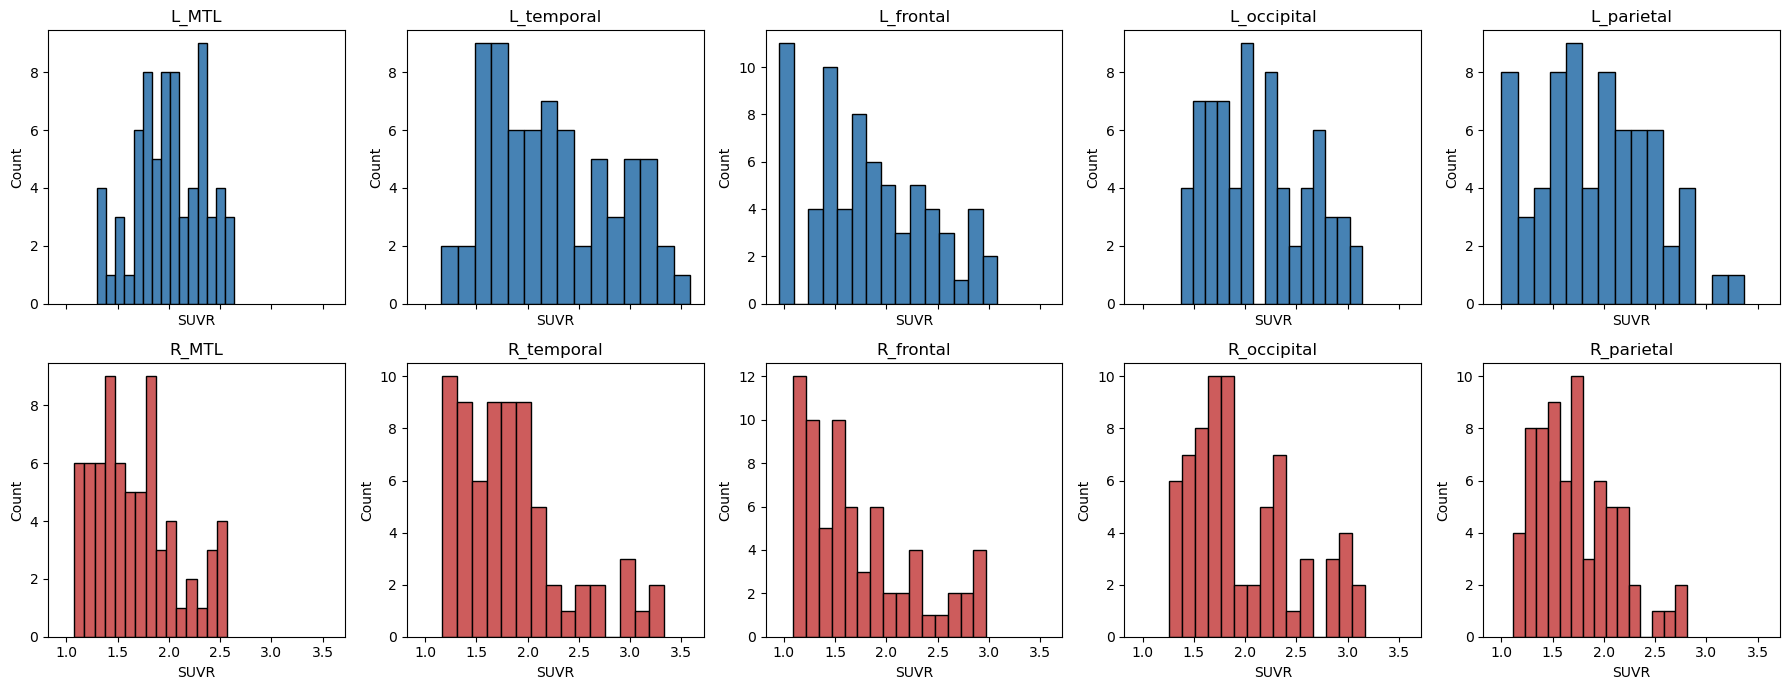

In [903]:
import matplotlib.pyplot as plt

# Define left and right ROIs
left_rois = ['L_MTL', 'L_temporal', 'L_frontal', 'L_occipital', 'L_parietal']
right_rois = ['R_MTL', 'R_temporal', 'R_frontal', 'R_occipital', 'R_parietal']

fig, axes = plt.subplots(2, 5, figsize=(18, 7), sharex=True)
# Plot left ROIs on the first row
for i, roi in enumerate(left_rois):
    data = roi_wide_merged[roi].dropna()
    axes[0, i].hist(data, bins=15, color='steelblue', edgecolor='black')
    axes[0, i].set_title(roi)
    axes[0, i].set_xlabel('SUVR')
    axes[0, i].set_ylabel('Count')

# Plot right ROIs on the second row
for i, roi in enumerate(right_rois):
    data = roi_wide_merged[roi].dropna()
    axes[1, i].hist(data, bins=15, color='indianred', edgecolor='black')
    axes[1, i].set_title(roi)
    axes[1, i].set_xlabel('SUVR')
    axes[1, i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# subtype and stage

## z-score

In [904]:
# Create a new DataFrame with all columns except the original SUVR columns,
# rename the z-score columns to the lobar ROI names, and UCSFID to subj
zdata_ucsf = roi_wide_merged.drop(columns=lobes).rename(
    columns={**{f"{roi}_z": roi for roi in lobes if f"{roi}_z" in roi_wide_merged.columns}, 'UCSFID': 'subj'}
)
print(zdata_ucsf.shape)
print(zdata_ucsf.columns)
zdata_ucsf.head()

(70, 47)
Index(['subj', 'PIDN', 'APOE', 'DigitFW', 'ucsf_dx', 'CDRSUM', 'MMSETot',
       'CVLT', 'BID', 'clin_severity', 'Centiloid', 'cogpet_datediff', 'Educ',
       'SemanticFluency', 'tiv_pib', 'DCDate', 'DigitBW', 'dx',
       'cortical_ftp_suvr', 'taudate', 'pib_cortex', 'tiv_ftp',
       'cortical_summary_PiB_SUVR', 'age', 'sex', 'metaROI_FTP_SUVR',
       'amyloid_path', 'VegCorr', 'tau_path', 'BensonCopy', 'amyloid_date',
       'ftp_cortex', 'Trails', 'BensonDelay', 'mri_cortex', 'APOEStatus',
       'APOEGenotype', 'L_MTL', 'R_MTL', 'L_temporal', 'R_temporal',
       'L_frontal', 'R_frontal', 'L_occipital', 'R_occipital', 'L_parietal',
       'R_parietal'],
      dtype='object')


,subj,PIDN,APOE,DigitFW,ucsf_dx,CDRSUM,MMSETot,CVLT,BID,clin_severity,...,L_MTL,R_MTL,L_temporal,R_temporal,L_frontal,R_frontal,L_occipital,R_occipital,L_parietal,R_parietal
0,UCSF16304,16304,E3E3,NaN,amnestic,7.5,8.0,0.0,B14-304,dementia,...,4.767313,3.141622,12.051518,13.034058,9.979622,4.421065,9.399794,5.080291,8.101055,7.997111
1,UCSF16407,16407,E3E3,4.0,pca,4.5,28.0,2.0,B14-237,dementia,...,6.358005,3.655132,6.254495,5.238912,11.117557,12.550162,4.581360,13.967557,6.722369,4.679760
2,UCSF16417,16417,E4E4,7.0,pca,5.0,22.0,1.0,B14-243,dementia,...,3.298604,7.317973,11.190387,11.161660,-0.800545,8.349617,16.318358,11.122623,1.484958,2.949942
3,UCSF16476,16476,E4E4,NaN,amnestic,4.0,30.0,NaN,B14-296,dementia,...,5.778129,5.519205,16.228182,4.785959,3.758939,5.865930,20.441223,8.508959,16.545042,11.327612
4,UCSF17159,17159,E3E3,4.0,ppa,NaN,NaN,1.0,B15-281,dementia,...,6.692307,2.738932,5.126841,4.979279,12.014562,6.194494,5.866822,4.035768,12.699759,4.872921


In [905]:
# import 
data_path = "/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/data/"
zmax = zdata_ucsf[lobes].apply(lambda x:np.percentile(x,95),axis=0).values#np.ceil(zdata_ucsf[lobes].apply(max,axis=0)).values  
thre = pd.read_csv(data_path+'2gmm_thre_exclude.csv') 
thre = thre[['roi','intersection','c2mean']] 
#print('fixed thresholds: 2, 5, 10')
print('ROI-specific thresholds: intersection, c2mean')
np.round(pd.concat([thre,pd.DataFrame({'max':zmax})],axis=1),2)

ROI-specific thresholds: intersection, c2mean


,roi,intersection,c2mean,max
0,L_MTL,1.13,5.13,14.09
1,R_MTL,1.25,4.92,13.38
2,L_temporal,1.86,15.20,30.58
3,R_temporal,1.97,14.68,27.65
4,L_frontal,1.49,10.73,27.41
5,R_frontal,1.80,9.98,26.42
6,L_occipital,2.21,15.40,32.99
7,R_occipital,2.04,14.92,33.31
8,L_parietal,2.12,16.58,24.12
9,R_parietal,2.12,18.07,21.36


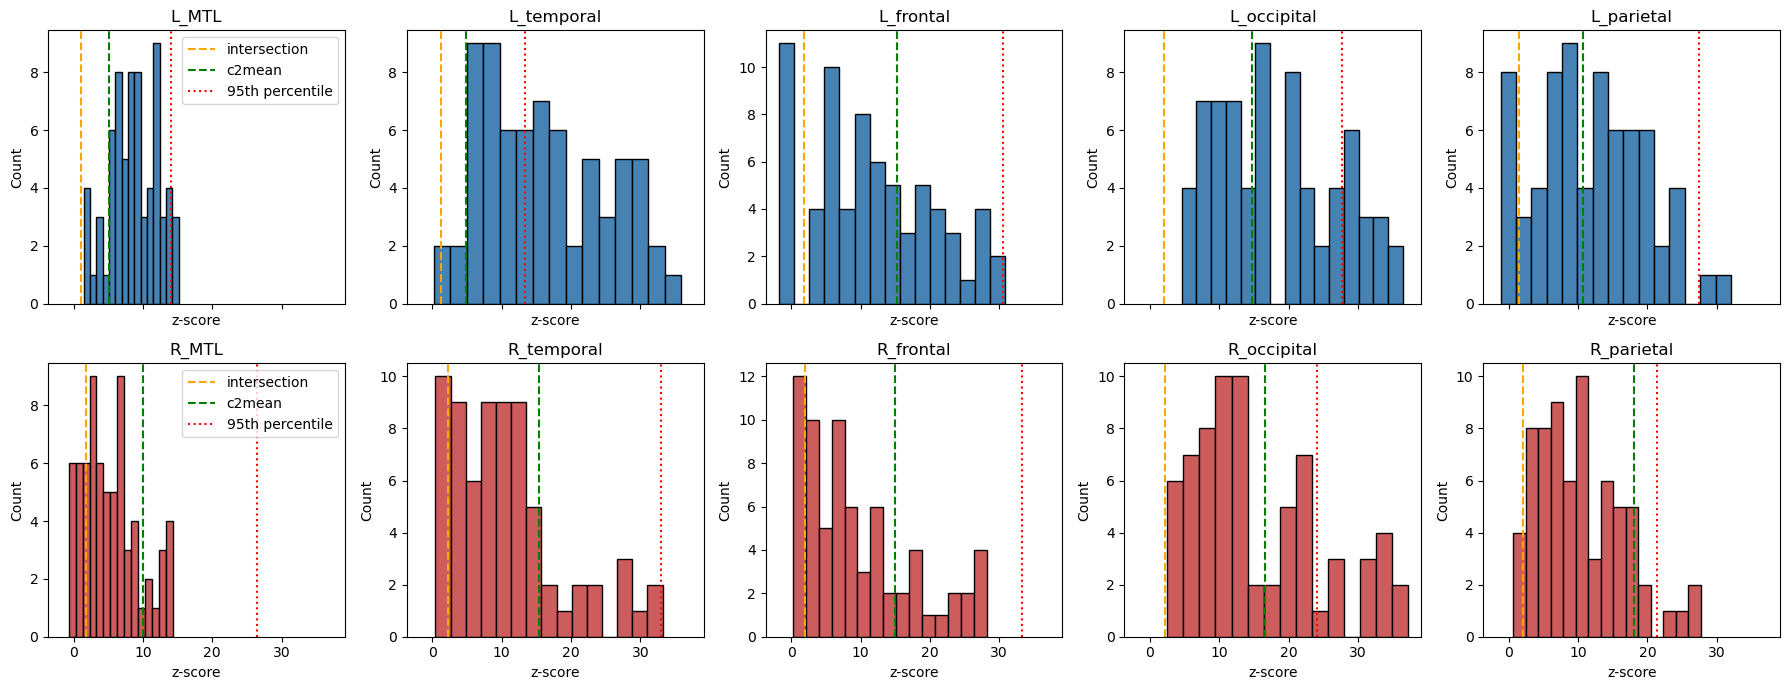

In [928]:
import matplotlib.pyplot as plt

# Get thresholds for each lobe
thre_lobes = thre.set_index('roi').reindex(lobes)
intersection_vals = thre_lobes['intersection'].values
c2mean_vals = thre_lobes['c2mean'].values

# Calculate 95th percentile for each lobe in zdata_ucsf
percentile95_vals = [np.percentile(zdata_ucsf[roi].dropna(), 95) for roi in lobes]

left_rois = ['L_MTL', 'L_temporal', 'L_frontal', 'L_occipital', 'L_parietal']
right_rois = ['R_MTL', 'R_temporal', 'R_frontal', 'R_occipital', 'R_parietal']

fig, axes = plt.subplots(2, 5, figsize=(18, 7), sharex=True)
for i, roi in enumerate(left_rois):
    data = zdata_ucsf[roi].dropna()
    axes[0, i].hist(data, bins=15, color='steelblue', edgecolor='black')
    axes[0, i].axvline(intersection_vals[i], color='orange', linestyle='--', label='intersection')
    axes[0, i].axvline(c2mean_vals[i], color='green', linestyle='--', label='c2mean')
    axes[0, i].axvline(percentile95_vals[i], color='red', linestyle=':', label='95th percentile')
    axes[0, i].set_title(roi)
    axes[0, i].set_xlabel('z-score')
    axes[0, i].set_ylabel('Count')
    if i == 0:
        axes[0, i].legend()

for i, roi in enumerate(right_rois):
    data = zdata_ucsf[roi].dropna()
    axes[1, i].hist(data, bins=15, color='indianred', edgecolor='black')
    axes[1, i].axvline(intersection_vals[i+5], color='orange', linestyle='--', label='intersection')
    axes[1, i].axvline(c2mean_vals[i+5], color='green', linestyle='--', label='c2mean')
    axes[1, i].axvline(percentile95_vals[i+5], color='red', linestyle=':', label='95th percentile')
    axes[1, i].set_title(roi)
    axes[1, i].set_xlabel('z-score')
    axes[1, i].set_ylabel('Count')
    if i == 0:
        axes[1, i].legend()

plt.tight_layout()
plt.show()

In [907]:
# read model 
# Load libraries 
import statsmodels.formula.api as smf 
# import the python packages needed to generate simulated data for the tutorial
import shutil 
import pickle 
import pylab  


In [908]:
# doesnt' matter will be reading from saved 
N = 10         # number of biomarkers
M = 70 # number of observations ( e.g. subjects )
M_control = 0   # number of these that are control subjects
N_startpoints = 25 #25
#N_S_gt = 1 #number of ground truth subtypes
N_S_max = 6 #7
N_iterations_MCMC = int(1e6) #1e4 / 1e6

SuStaInLabels = lobes
Z_vals = thre[['intersection','c2mean']].values#,'c2mean+sd']].values #np.array([[2,5,10]]*N) ## thre[['intersection','c2mean-sd','c2mean+sd']].values  # Z-scores for each biomarker
Z_max = zmax  #z95 #np.array([10]*N)           # maximum z-score 
output_folder = "/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean"#'inter_c2mean_sd_e6'#c2mean_sd_e6
dataset_name = '2GMMz' 
sustain_input = pySuStaIn.ZscoreSustain(zdata_ucsf[lobes].values,
                                             Z_vals,
                                             Z_max,
                                             SuStaInLabels,
                                             N_startpoints,
                                             N_S_max, 
                                             N_iterations_MCMC, 
                                             output_folder, 
                                             dataset_name, 
                                             True)
print(f'reading output from: {output_folder}')

reading output from: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean


In [909]:
warnings.filterwarnings("ignore")
sustain_input = pySuStaIn.ZscoreSustain(zdata_ucsf[lobes].values,
                                             Z_vals,
                                             Z_max,
                                             SuStaInLabels,
                                             N_startpoints,
                                             N_S_max, 
                                             N_iterations_MCMC, 
                                             output_folder, 
                                             dataset_name, 
                                             True)
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()    

Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype1.pickle. Using pickled variables for 1 subtype.
Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype2.pickle. Using pickled variables for 2 subtype.
Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype3.pickle. Using pickled variables for 3 subtype.
Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype4.pickle. Using pickled variables for 4 subtype.
Found pickle file: /Users/mlin2/Desktop/RabLab/eoad_sustain_ml/inter_c2mean/pickle_files/2GMMz_subtype5.pickle. Using pickled variables for 5 subtype.


In [924]:

zdata_full = pd.read_csv(data_path+'full_gmm2z_exclude.csv')
zdata = zdata_full[zdata_full.visit>1]
zdata.head(2)

,subj,dx,ftp_date,L_MTL,L_frontal,L_occipital,L_parietal,L_temporal,R_MTL,R_frontal,R_occipital,R_parietal,R_temporal,visit
2,LDS0070166,EOAD,2020-09-11,6.725235,21.182339,29.760720,23.598562,22.108123,5.712536,17.902218,27.729526,26.741426,21.426580,2
3,LDS0070166,EOAD,2021-10-29,7.356890,23.408391,33.110877,25.075874,25.207460,6.667848,20.954148,30.209827,28.697858,24.404788,3


In [910]:
warnings.filterwarnings("ignore")
# subtype and stage all scans 
typedf = zdata_ucsf.copy() 
for i in range(1, N_S_max): #i is the number of split, so starting from 1 split = 2 subtypes
  
    pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(i) + '.pickle'
    pk = pd.read_pickle(pickle_filename_s)
    new_dat = typedf[lobes].values
    s_seq = pk['samples_sequence']
    s_f = pk['samples_f']
    n_s = 70
    ml_subtype, prob_ml_subtype, ml_stage, prob_ml_stage, prob_subtype, prob_stage, prob_subtype_stage = \
        pySuStaIn.ZscoreSustain.subtype_and_stage_individuals_newData(sustain_input, data_new = new_dat, 
    samples_sequence = s_seq, samples_f = s_f , N_samples = n_s)
    # if the probability is smaller than 0.5, poorly fit
    subtypes = ml_subtype#[ml_subtype[i] if prob_ml_subtype[i] >= 0.5 else 98 for i in range(len(ml_subtype))]
    typedf[str(i+1)] = subtypes
    # Add 1 to the subtype (assuming it's indexed from 0 in original)
    typedf[str(i+1)] = typedf[str(i+1)].astype(int) + 1
    # Assign the ml_stage
    stage = str(i+1) + 's'
    typedf[stage] = ml_stage
    typedf[stage] = typedf[stage].astype(int) 
    subtype_prob_name = f'{str(i+1)}_subtype_prob'
    typedf[subtype_prob_name] = prob_ml_subtype
    stage_prob_name = f'{str(i+1)}_stage_prob'
    typedf[stage_prob_name] = prob_ml_stage


## alluvial

In [911]:
import plotly.graph_objects as go

# Step 1: Build category orders for each split (most to least frequent)
category_orders = {}
for col in [str(i) for i in range(2, N_S_max)]:
    order = typedf[col].value_counts().sort_values(ascending=False).index.astype(str).tolist()
    category_orders[col] = order

# Step 2: Build dimensions list with categoryarray set for sorting
dimensions = []
for i in range(2, N_S_max):
    col = str(i)
    dim = dict(
        label="",
        values=typedf[col].astype(str),
        categoryorder="array",
        categoryarray=category_orders[col]
    )
    dimensions.append(dim)

# Step 3: Map subtype at split 3 to color
color_map = {
    '1': "#1f449c",
    '2': "#32ABA6",
    '3': "#f05039",
}
colors = typedf['3'].astype(str).map(color_map)

# Step 4: Create alluvial plot
fig = go.Figure(data=[
    go.Parcats(
        dimensions=dimensions,
        line={'color': colors},
        hoveron='color',
        labelfont={'size': 12, 'family': 'Arial'},
        tickfont={'size': 10, 'family': 'Arial'},
        arrangement='freeform',
        bundlecolors=True,
        sortpaths='forward'
    )
])

fig.update_layout(
    title="",
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

# tableone

## clinical dx

In [912]:
typedf.ucsf_dx.value_counts()

ucsf_dx
amnestic       37
pca            14
ppa            12
nonamnestic     7
Name: count, dtype: int64

## anova tableone 

In [913]:
from tableone import TableOne

In [914]:
tdata = typedf.copy()
tdata['subtype'] = tdata['3'].astype(int)
tdata['stage'] = tdata['3s'].astype(int)
tdata['subtype_prob'] = tdata['3_subtype_prob']
print(len(tdata[tdata.subtype_prob < 0.7]))
#tdata = tdata[tdata.subtype_prob >= 0.7]
tdata['subtype_prob'] = np.round(tdata['subtype_prob'], 2)
tdata.shape

2


(70, 70)

In [915]:
tdata.subtype.value_counts()

subtype
3    27
2    26
1    17
Name: count, dtype: int64

### stage distribution 

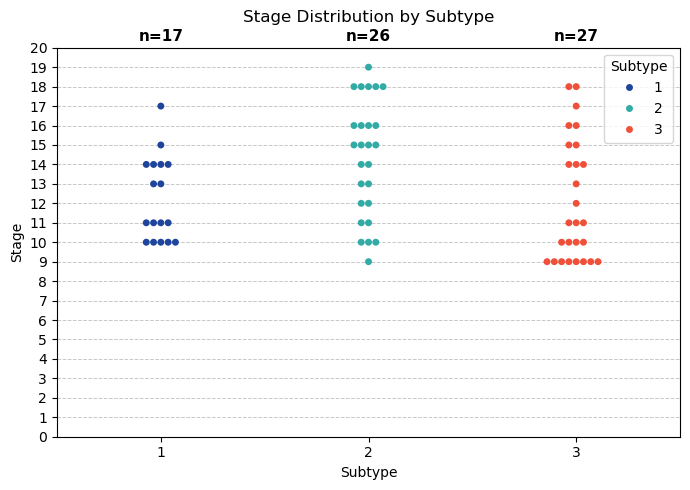

In [916]:


if 'subtype' in tdata.columns and 'stage' in tdata.columns:
    plt.figure(figsize=(7, 5))
    ax = sns.swarmplot(
        data=tdata,
        x='subtype',
        y='stage',
        hue='subtype',
        palette={1: "#1f449c", 2: "#32ABA6", 3: "#f05039"},
        dodge=False
    )
    ax.set_xlabel('Subtype')
    ax.set_ylabel('Stage')
    ax.set_ylim(0, 20)
    ax.set_yticks(range(0, 21, 1))
    ax.set_yticklabels([str(i) for i in range(0, 21, 1)])
    ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.legend(title='Subtype')
    plt.title('Stage Distribution by Subtype\n')
    # Annotate total count on top of each subtype
    subtype_counts = tdata['subtype'].value_counts().sort_index()
    for i, count in enumerate(subtype_counts):
        ax.text(i, 20.2, f'n={count}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()

## sbutype probability

<Figure size 800x500 with 0 Axes>

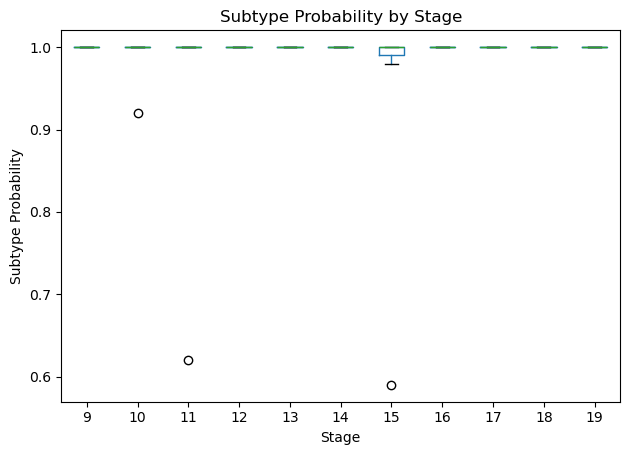

In [917]:
import matplotlib.pyplot as plt

# Boxplot of subtype probability at each stage
if 'stage' in tdata.columns and 'subtype_prob' in tdata.columns:
    plt.figure(figsize=(8, 5))
    tdata.boxplot(column='subtype_prob', by='stage', grid=False)
    plt.xlabel('Stage')
    plt.ylabel('Subtype Probability')
    plt.title('Subtype Probability by Stage')
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

### anova

In [918]:
typedf.columns

Index(['subj', 'PIDN', 'APOE', 'DigitFW', 'ucsf_dx', 'CDRSUM', 'MMSETot',
       'CVLT', 'BID', 'clin_severity', 'Centiloid', 'cogpet_datediff', 'Educ',
       'SemanticFluency', 'tiv_pib', 'DCDate', 'DigitBW', 'dx',
       'cortical_ftp_suvr', 'taudate', 'pib_cortex', 'tiv_ftp',
       'cortical_summary_PiB_SUVR', 'age', 'sex', 'metaROI_FTP_SUVR',
       'amyloid_path', 'VegCorr', 'tau_path', 'BensonCopy', 'amyloid_date',
       'ftp_cortex', 'Trails', 'BensonDelay', 'mri_cortex', 'APOEStatus',
       'APOEGenotype', 'L_MTL', 'R_MTL', 'L_temporal', 'R_temporal',
       'L_frontal', 'R_frontal', 'L_occipital', 'R_occipital', 'L_parietal',
       'R_parietal', '2', '2s', '2_subtype_prob', '2_stage_prob', '3', '3s',
       '3_subtype_prob', '3_stage_prob', '4', '4s', '4_subtype_prob',
       '4_stage_prob', '5', '5s', '5_subtype_prob', '5_stage_prob', '6', '6s',
       '6_subtype_prob', '6_stage_prob'],
      dtype='object')

In [919]:
cont = ['age','stage','Trails','MMSETot','CDRSUM','DigitFW','DigitBW','SemanticFluency','BensonCopy','BensonDelay','CVLT',"Educ",'subtype_prob',
        "cortical_ftp_suvr","Centiloid","metaROI_FTP_SUVR","cortical_summary_PiB_SUVR"]
cat = ['sex','ucsf_dx','clin_severity','APOEStatus']
# Show basic statistics for each variable in cont
qc_stats = tdata[cont].describe(include='all').T
display(qc_stats.round(2))

,count,mean,std,min,25%,50%,75%,max
age,70.0,58.47,4.52,47.00,55.25,59.00,62.00,65.00
stage,70.0,12.96,3.01,9.00,10.00,13.00,15.00,19.00
Trails,42.0,79.60,39.88,17.00,39.00,77.50,120.00,120.00
MMSETot,65.0,21.14,5.89,6.00,19.00,21.00,25.00,30.00
CDRSUM,65.0,4.23,2.36,0.00,2.50,4.00,5.00,12.00
DigitFW,63.0,5.35,1.46,3.00,4.00,5.00,6.50,9.00
DigitBW,61.0,3.49,1.61,0.00,2.00,3.00,4.00,8.00
SemanticFluency,61.0,11.72,5.78,2.00,7.00,10.00,16.00,23.00
BensonCopy,64.0,10.81,5.44,0.00,6.00,14.00,15.00,16.00
BensonDelay,63.0,4.70,4.23,0.00,1.00,3.00,8.00,15.00


In [920]:
cont = ['age','stage','Trails','MMSETot','CDRSUM','DigitFW','DigitBW','SemanticFluency','BensonCopy','BensonDelay','CVLT',"Educ",'subtype_prob',
        "cortical_ftp_suvr","Centiloid","metaROI_FTP_SUVR","cortical_summary_PiB_SUVR"]
cat = ['sex','ucsf_dx','clin_severity','APOEStatus']
TableOne(data=tdata[tdata.subtype.isin([1,2,3])], columns=cont+cat, categorical=cat, groupby='subtype', pval=True,row_percent=False)


Grouped by subtype                                                             
                                                            Missing      Overall            1             2            3 P-Value
n                                                                             70           17            26           27        
age, mean (SD)                                                    0   58.5 (4.5)   58.1 (5.2)    58.0 (4.5)   59.1 (4.2)   0.615
stage, mean (SD)                                                  0   13.0 (3.0)   12.2 (2.2)    14.3 (3.0)   12.1 (3.1)   0.013
Trails, mean (SD)                                                28  79.6 (39.9)  65.2 (42.4)   92.5 (35.8)  75.7 (40.7)   0.212
MMSETot, mean (SD)                                                5   21.1 (5.9)   22.6 (6.5)    19.2 (6.8)   22.0 (4.1)   0.130
CDRSUM, mean (SD)                                                 5    4.2 (2.4)    4.2 (2.6)     4.5 (2.3)    4.0 (2.3)   0.715
DigitFW, mean (SD)                                                7    5.3 (1.5)    5.8 (1.5)     5.0 (1.4)    5.5 (1.4)   0.207
DigitBW, mean (SD)                                                9    3.5 (1.6)    3.9 (1.8)     3.0 (1.7)    3.7 (1.3)   0.232
SemanticFluency, mean (SD)                                        9   11.7 (5.8)   12.6 (5.6)     9.8 (4.8)   13.0 (6.4)   0.139
BensonCopy, mean (SD)                                             6   10.8 (5.4)   12.5 (4.3)    10.2 (5.8)   10.4 (5.7)   0.409
BensonDelay, mean (SD)                                            7    4.7 (4.2)    6.1 (4.3)     4.2 (4.3)    4.4 (4.2)   0.352
CVLT, mean (SD)                                                   4    2.4 (2.8)    2.9 (3.1)     1.5 (2.1)    2.9 (2.9)   0.112
Educ, mean (SD)                                                   3   16.4 (2.8)   16.2 (2.5)    16.2 (2.7)   16.7 (3.2)   0.797
subtype_prob, mean (SD)                                           0    1.0 (0.1)    0.9 (0.1)     1.0 (0.0)    1.0 (0.0)   0.022
cortical_ftp_suvr, mean (SD)                                      0    1.9 (0.4)    1.9 (0.4)     2.0 (0.4)    1.9 (0.4)   0.565
Centiloid, mean (SD)                                              0  98.0 (31.4)  97.2 (36.1)  102.0 (36.5)  94.7 (22.5)   0.699
metaROI_FTP_SUVR, mean (SD)                                       0    2.2 (0.5)    2.1 (0.5)     2.2 (0.5)    2.2 (0.5)   0.683
cortical_summary_PiB_SUVR, mean (SD)                              0    2.1 (0.3)    2.1 (0.4)     2.1 (0.4)    2.1 (0.2)   0.699
sex, n (%)                           Female                            40 (57.1)     9 (52.9)     17 (65.4)    14 (51.9)   0.562
                                     Male                              30 (42.9)     8 (47.1)      9 (34.6)    13 (48.1)        
ucsf_dx, n (%)                       amnestic                          37 (52.9)    12 (70.6)     13 (50.0)    12 (44.4)   0.619
                                     nonamnestic                        7 (10.0)      1 (5.9)       2 (7.7)     4 (14.8)        
                                     pca                               14 (20.0)     2 (11.8)      5 (19.2)     7 (25.9)        
                                     ppa                               12 (17.1)     2 (11.8)      6 (23.1)     4 (14.8)        
clin_severity, n (%)                 MCI                               10 (14.3)     4 (23.5)       2 (7.7)     4 (14.8)   0.347
                                     dementia                          60 (85.7)    13 (76.5)     24 (92.3)    23 (85.2)        
APOEStatus, n (%)                    carrier                           40 (57.1)    11 (64.7)     16 (61.5)    13 (48.1)   0.474
                                     non-carrier                       30 (42.9)     6 (35.3)     10 (38.5)    14 (51.9)



ucsf_dx, n (%)	amnestic		37 (52.9)	12 (70.6)	13 (50.0)	12 (44.4)	0.619
                nonamnestic		7 (10.0)	1 (5.9)	2 (7.7)	4 (14.8)	
                        pca		14 (20.0)	2 (11.8)	5 (19.2)	7 (25.9)	
                        ppa		12 (17.1)	2 (11.8)	6 (23.1)	4 (14.8)	               

In [921]:
# Prepare TableOne for 4-subtype assignment
tdata_4 = typedf.copy()
tdata_4['subtype'] = tdata_4['4'].astype(int)
tdata_4['stage'] = tdata_4['4s'].astype(int)
tdata_4['subtype_prob'] = tdata_4['4_subtype_prob']
tdata_4 = tdata_4[tdata_4.subtype_prob >= 0.5]
tdata_4['subtype_prob'] = np.round(tdata_4['subtype_prob'], 2)

cont = ['age','stage','Trails','MMSETot','CDRSUM','DigitFW','DigitBW','SemanticFluency','BensonCopy','BensonDelay','CVLT',"Educ",'subtype_prob',
    "cortical_ftp_suvr","Centiloid","metaROI_FTP_SUVR","cortical_summary_PiB_SUVR"]
cat = ['sex','ucsf_dx','clin_severity','APOEStatus']

TableOne(data=tdata_4[tdata_4.subtype.isin([1,2,3,4])], columns=cont+cat, categorical=cat, groupby='subtype', pval=True, row_percent=False)


Grouped by subtype                                                                          
                                                            Missing      Overall            1            2            3             4 P-Value
n                                                                             70           15           18           22            15        
age, mean (SD)                                                    0   58.5 (4.5)   57.9 (5.5)   57.4 (4.9)   59.1 (4.3)    59.3 (3.2)   0.536
stage, mean (SD)                                                  0   12.8 (3.1)   14.5 (2.9)   13.7 (2.6)   12.7 (3.1)    10.3 (2.3)   0.001
Trails, mean (SD)                                                28  79.6 (39.9)  71.5 (43.8)  86.5 (37.2)  71.3 (39.0)   91.1 (42.1)   0.586
MMSETot, mean (SD)                                                5   21.1 (5.9)   20.0 (7.1)   19.9 (7.1)   21.6 (3.8)    22.9 (6.0)   0.459
CDRSUM, mean (SD)                                                 5    4.2 (2.4)    5.2 (3.3)    4.3 (1.8)    3.8 (2.2)     3.9 (2.2)   0.375
DigitFW, mean (SD)                                                7    5.3 (1.5)    5.9 (1.7)    4.9 (1.3)    5.5 (1.4)     5.1 (1.4)   0.219
DigitBW, mean (SD)                                                9    3.5 (1.6)    3.6 (2.1)    3.3 (1.8)    3.6 (1.4)     3.5 (1.3)   0.973
SemanticFluency, mean (SD)                                        9   11.7 (5.8)   11.9 (5.8)   10.0 (5.6)   13.1 (6.0)    11.2 (5.7)   0.472
BensonCopy, mean (SD)                                             6   10.8 (5.4)   11.9 (4.8)    9.9 (6.3)    9.8 (5.8)    12.6 (3.8)   0.361
BensonDelay, mean (SD)                                            7    4.7 (4.2)    4.8 (3.7)    4.4 (4.6)    3.8 (3.9)     6.5 (4.6)   0.342
CVLT, mean (SD)                                                   4    2.4 (2.8)    1.6 (2.3)    1.8 (2.4)    2.4 (2.4)     3.9 (3.7)   0.124
Educ, mean (SD)                                                   3   16.4 (2.8)   16.7 (1.8)   16.1 (3.1)   16.4 (3.3)    16.3 (2.8)   0.943
subtype_prob, mean (SD)                                           0    1.0 (0.1)    1.0 (0.1)    1.0 (0.1)    1.0 (0.1)     1.0 (0.1)   0.967
cortical_ftp_suvr, mean (SD)                                      0    1.9 (0.4)    2.0 (0.5)    1.9 (0.5)    1.9 (0.4)     1.9 (0.3)   0.870
Centiloid, mean (SD)                                              0  98.0 (31.4)  95.6 (28.9)  96.8 (43.7)  96.4 (20.8)  104.5 (31.6)   0.853
metaROI_FTP_SUVR, mean (SD)                                       0    2.2 (0.5)    2.2 (0.5)    2.1 (0.6)    2.2 (0.5)     2.2 (0.5)   0.860
cortical_summary_PiB_SUVR, mean (SD)                              0    2.1 (0.3)    2.1 (0.3)    2.1 (0.4)    2.1 (0.2)     2.2 (0.3)   0.853
sex, n (%)                           Female                            40 (57.1)     8 (53.3)    13 (72.2)    12 (54.5)      7 (46.7)   0.477
                                     Male                              30 (42.9)     7 (46.7)     5 (27.8)    10 (45.5)      8 (53.3)        
ucsf_dx, n (%)                       amnestic                          37 (52.9)    11 (73.3)     9 (50.0)    11 (50.0)      6 (40.0)   0.813
                                     pca                               14 (20.0)     2 (13.3)     4 (22.2)     5 (22.7)      3 (20.0)        
                                     ppa                               12 (17.1)     2 (13.3)     3 (16.7)     3 (13.6)      4 (26.7)        
                                     nonamnestic                        7 (10.0)                  2 (11.1)     3 (13.6)      2 (13.3)        
clin_severity, n (%)                 MCI                               10 (14.3)     3 (20.0)     2 (11.1)     3 (13.6)      2 (13.3)   0.904
                                     dementia                          60 (85.7)    12 (80.0)    16 (88.9)    19 (86.4)     13 (86.7)        
APOEStatus, n (%)                    carrier                           40

# visualization

In [922]:
# Group and count the data to prepare for the Sankey diagram
sankey_data = tdata.groupby(['subtype', 'ucsf_dx']).size().reset_index(name='Count')

# Create lists of unique nodes for subtypes and behaviors
subtype_nodes = [x for x in sorted(tdata['subtype'].unique())]
# Remove np.nan from the list of clinical_phenotype values before creating behavior_nodes
behavior_nodes = sorted([x for x in tdata['ucsf_dx'].unique() if pd.notnull(x)])

# Combine all nodes into a single list
all_nodes = subtype_nodes + behavior_nodes

# Create source and target indices
sankey_data['Source'] = sankey_data['subtype'].apply(lambda x: all_nodes.index(x))
sankey_data['Target'] = sankey_data['ucsf_dx'].apply(lambda x: all_nodes.index(x))

# Calculate total counts for each cognitive behavior to compute percentages
total_counts = sankey_data.groupby('Target')['Count'].transform('sum')
sankey_data['Percentage'] = (sankey_data['Count'] / total_counts) * 100
 

In [923]:
# Force subtype order to [1, 2, 3]
subtype_nodes = [1, 2, 3]
behavior_nodes = [x for x in behavior_nodes if x not in subtype_nodes]
all_nodes = subtype_nodes + behavior_nodes
import plotly.graph_objects as go

# Use sankey_data from cell 47
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[str(x) for x in all_nodes],  # all_nodes is defined in cell 47
        color=["#1f449c", "#32ABA6", "#f05039"] + ["#888888"]*(len(all_nodes)-3)
    ),
    link=dict(
        source=sankey_data['Source'],
        target=sankey_data['Target'],
        value=sankey_data['Count'],
        color=[["#1f449c", "#32ABA6", "#f05039"][s] if s < 3 else "#cccccc" for s in sankey_data['Source']]
    )
)])

fig.update_layout(title_text="Alluvial plot: SuStaIn Subtype (left) vs Clinical Phenotypes (Right))", font_size=12)
fig.show()
